# understanding problem 

- The Car Price Prediction challenge is a regression problem where the objective is to develop a predictive model that estimates the price of a car based on a set of input features


# Import library 

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
RANDOM_STATE = 42
import datetime as dt


# dataset

## load dataset 

In [2]:
dataset=pd.read_csv(r'C:\Users\lap shop\OneDrive\Documents\GDG\car_price_prediction.csv')

## about dataset

In [3]:
dataset.head(40)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [4]:
dataset.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

- ID: A unique identifier for each car entry in the dataset.
- Price: The target variable representing the market price of the car (typically in a specified currency).
- Levy: A tax or fee associated with the car; may represent a special levy imposed on certain types of vehicles (e.g., emissions-related fees).
- Manufacturer: The brand or company that produced the car (e.g., Toyota, BMW).
- Model: The specific model of the car (e.g., Corolla, 3 Series).
- Prod. year: The production or manufacturing year of the car, indicating its age.
- Category: The type or classification of the car (e.g., sedan, SUV, truck).
- Leather interior: A binary or categorical feature indicating whether the car has a leather interior (e.g., "Yes"/"No").
- Fuel type: The type of fuel the car uses, such as petrol, diesel, electric, or hybrid.
- Engine volume: The size of the engine, usually expressed in liters (e.g., 1.6L, 2.0L); may sometimes include additional information like "2.0 Turbo".
- Mileage: The total distance the car has been driven, typically measured in kilometers or miles.
- Cylinders: The number of engine cylinders, which can indicate the power and efficiency of the car's engine.
- Gear box type: The type of transmission system the car has (e.g., manual, automatic, semi-automatic).
- Drive wheels: The drivetrain configuration, indicating which wheels receive power from the engine (e.g., front-wheel drive, rear-wheel drive, all-wheel drive).
- Doors: The number of doors on the car (e.g., 2, 4).
- Wheel: Refers to the steering wheel position, indicating if the car is left-hand or right-hand drive.
- Color: The color of the car's exterior.
- Airbags: The number of airbags installed in the car, which can be an indicator of safety features.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
dataset.shape

(19237, 18)

In [7]:
dataset.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [8]:
dataset.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [9]:
dataset.duplicated().sum()


313

In [10]:
dataset.drop_duplicates(inplace= True)


In [11]:
#dataset=dataset.drop(['ID'],axis=1)
time_now= dt.datetime.now()
dataset['Age']=time_now.year - dataset['Prod. year']

dataset['Mileage'] =dataset['Mileage'].str.replace('km',"")
dataset.Mileage = dataset.Mileage.astype('Int64')


# Replacing 'Turbo' with '' 
dataset['Engine volume'] = dataset['Engine volume'].str.replace('Turbo','')

# Converting Levy type to float
dataset['Engine volume'] = dataset['Engine volume'].astype('float64')



# Replacing '-' with 0
dataset['Levy']=dataset['Levy'].replace('-','0')

# Converting Levy type to float
dataset['Levy'] = dataset['Levy'].astype('float64')

In [12]:
dataset

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,14
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,13
2,45774419,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,18
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,13
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,0.0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,25
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,13
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,04-May,Left wheel,Grey,4,14
19235,45793526,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258,4.0,Automatic,Front,04-May,Left wheel,Black,4,17


# anyliys feats

## target 

In [13]:
dataset['Price'].describe()

count    1.892400e+04
mean     1.858744e+04
std      1.921356e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.206300e+04
max      2.630750e+07
Name: Price, dtype: float64

## numircal_coulmns 

In [14]:
numerical_cols= dataset.select_dtypes(exclude=object)


C:\Users\lap shop\AppData\Local\Temp\ipykernel_19832\264624390.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], ax=ax[0]).set(title="Distplot")
C:\Users\lap shop\AppData\Local\Temp\ipykernel_19832\264624390.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\lap shop\AppData\Local\Temp\ipykernel_19832\264624390.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `h

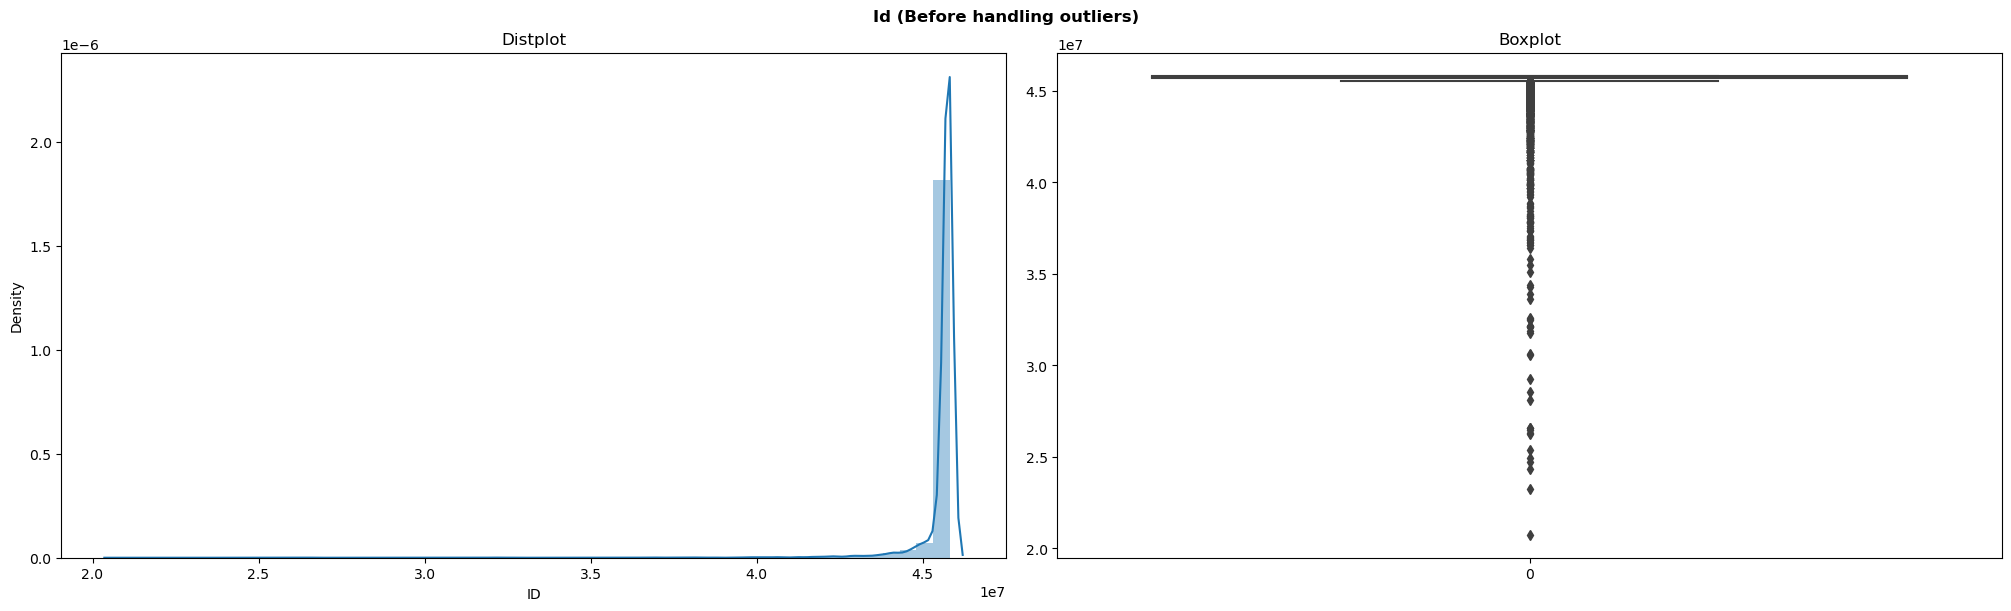

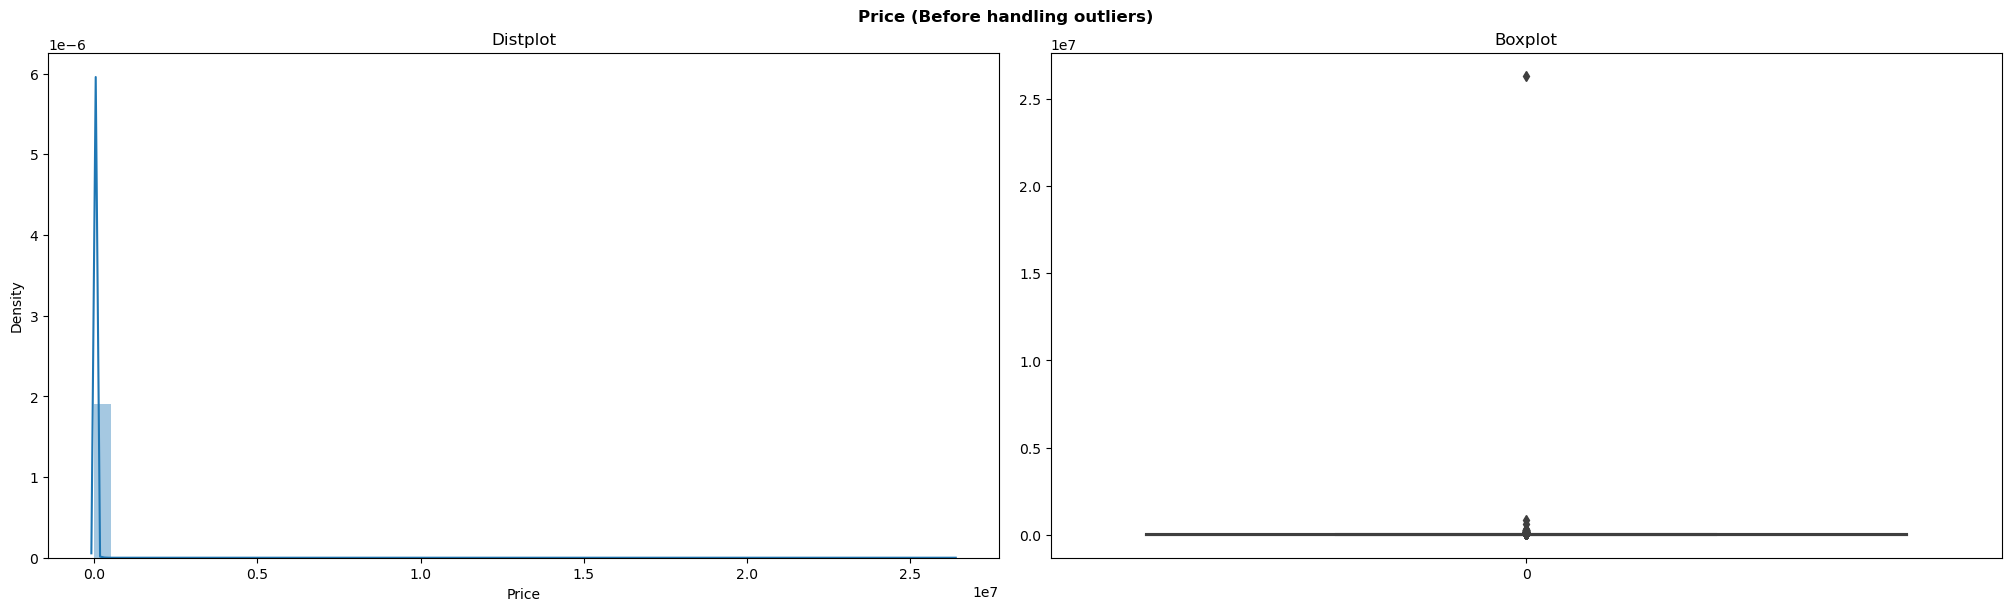

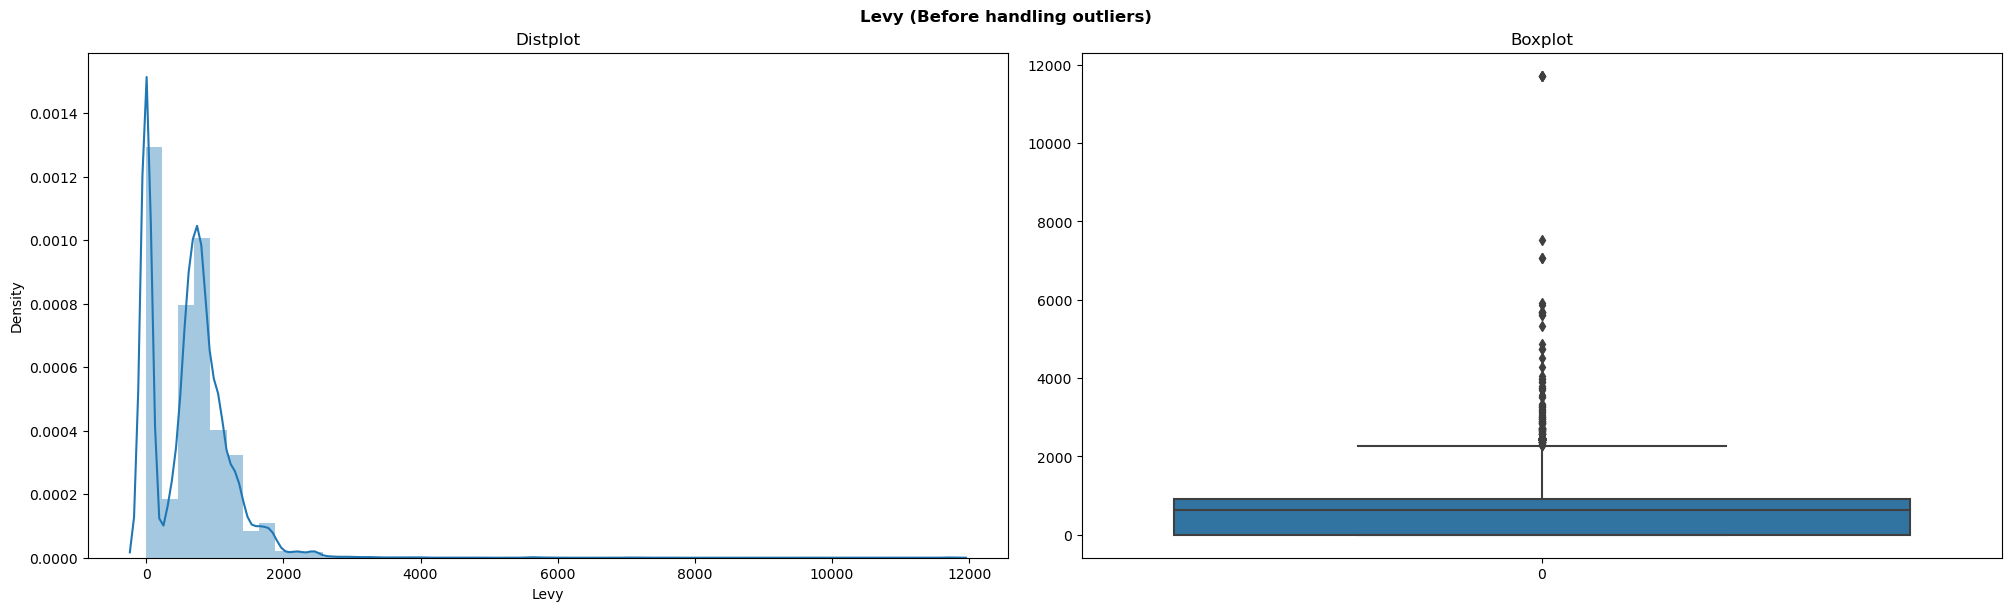

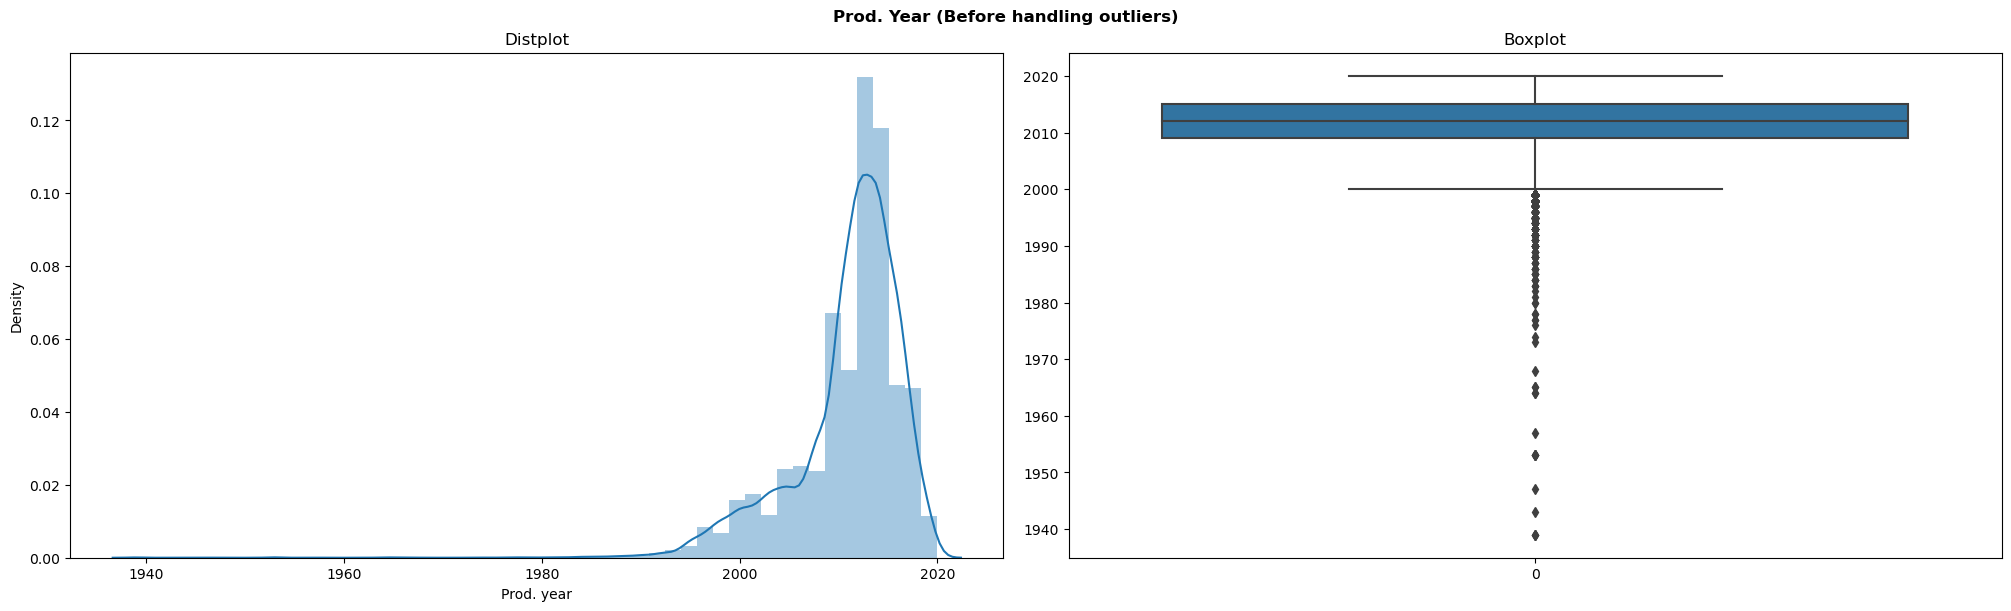

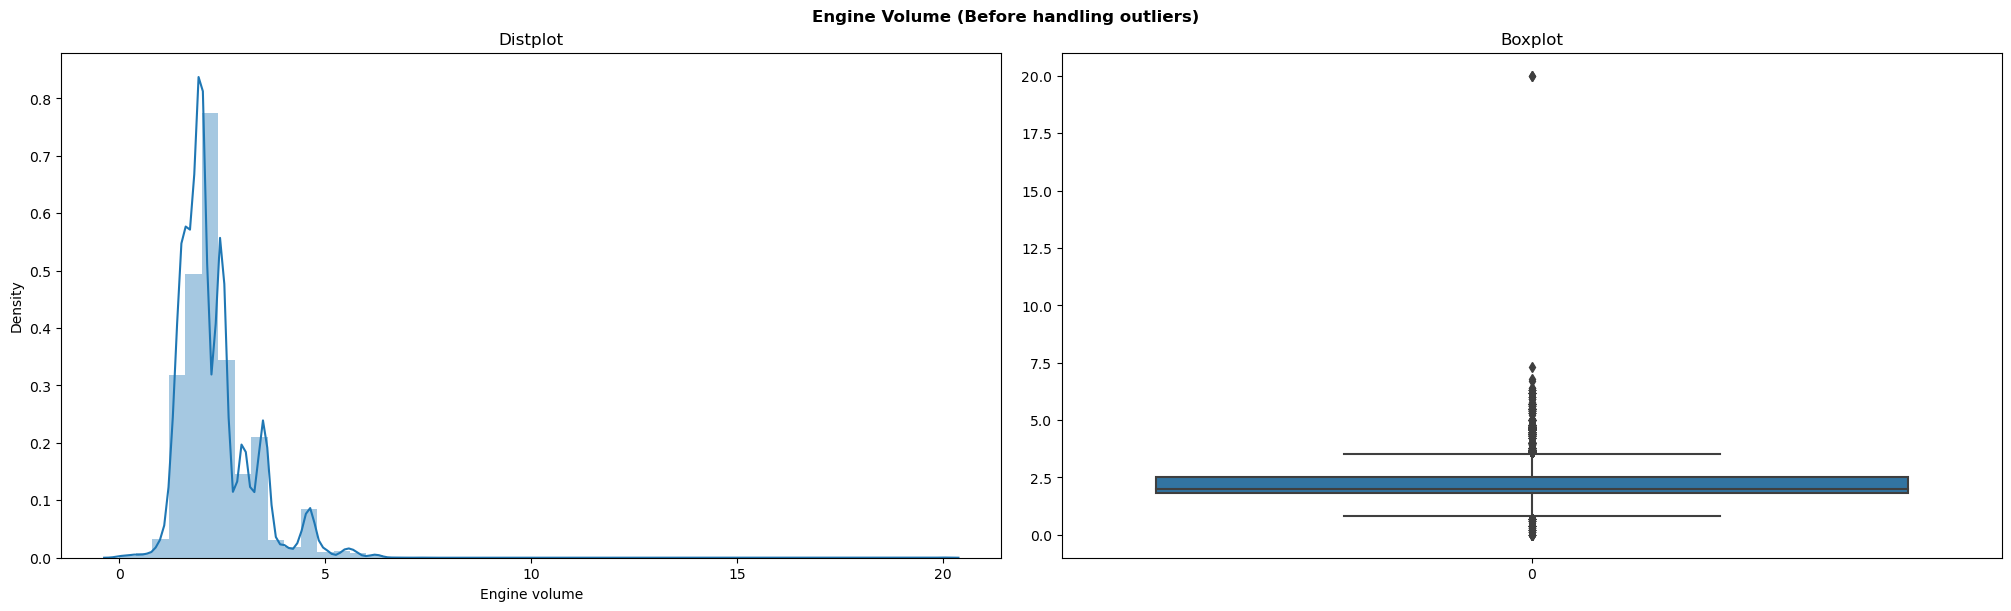

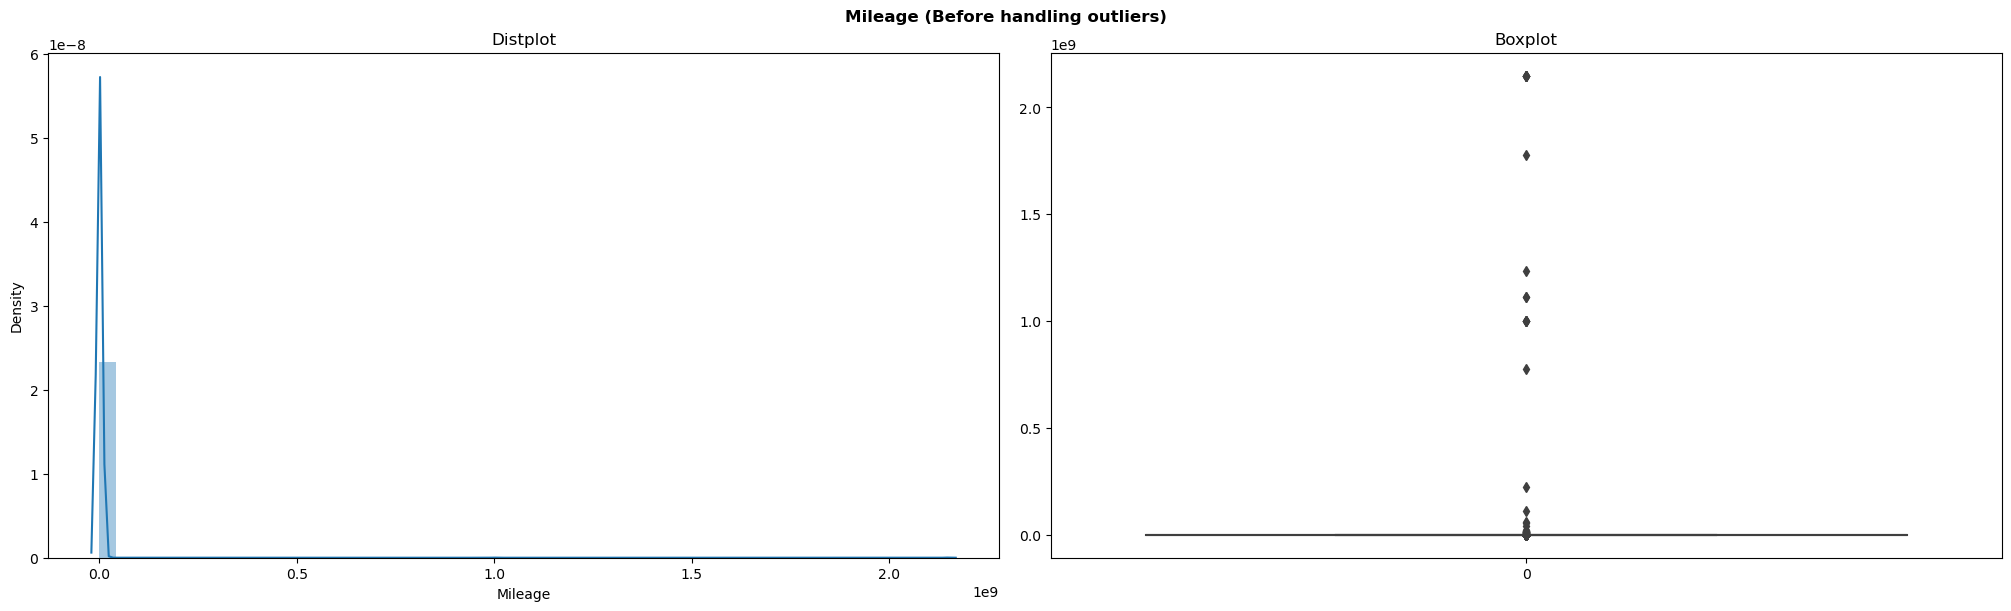

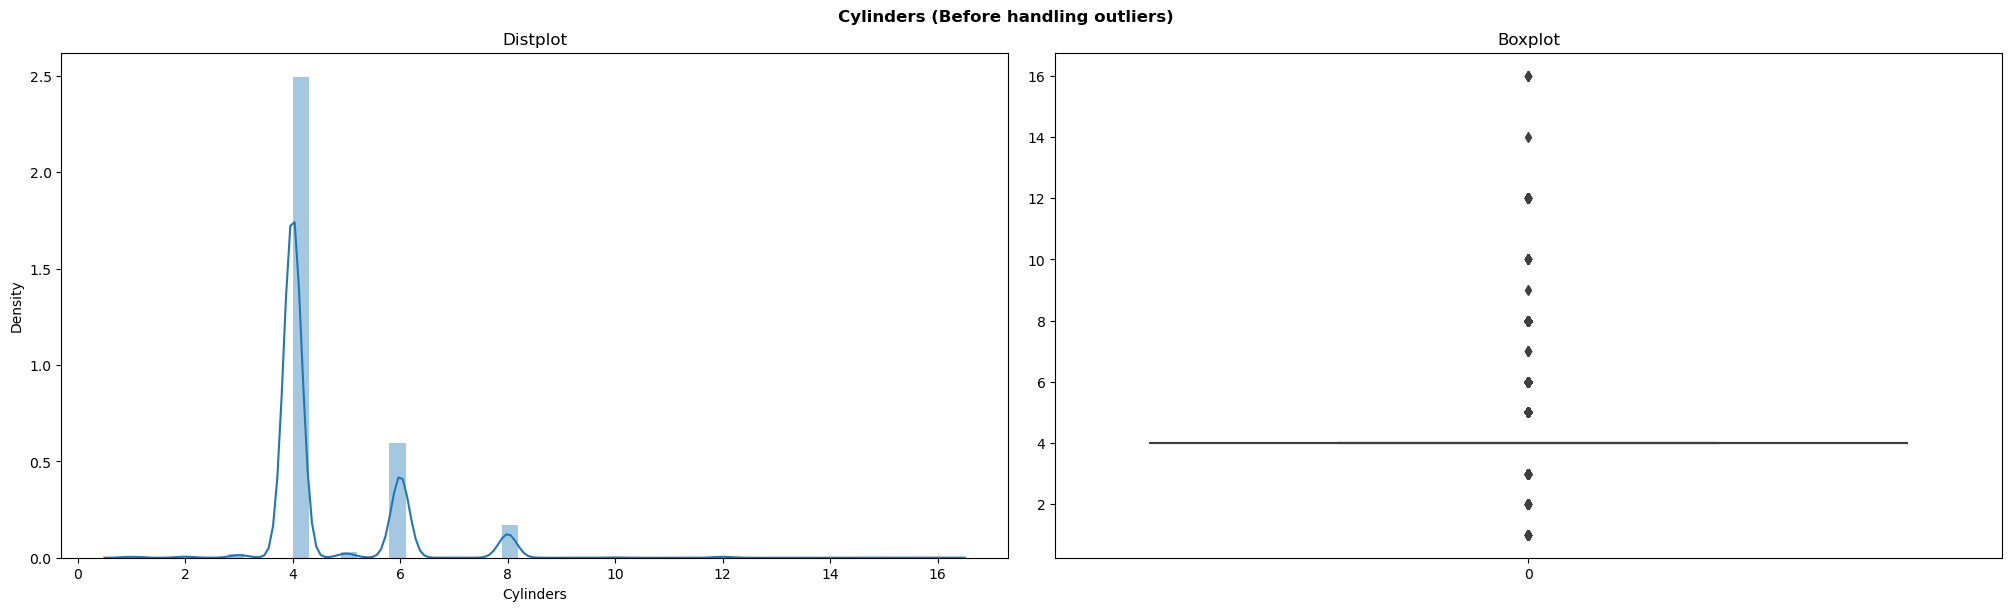

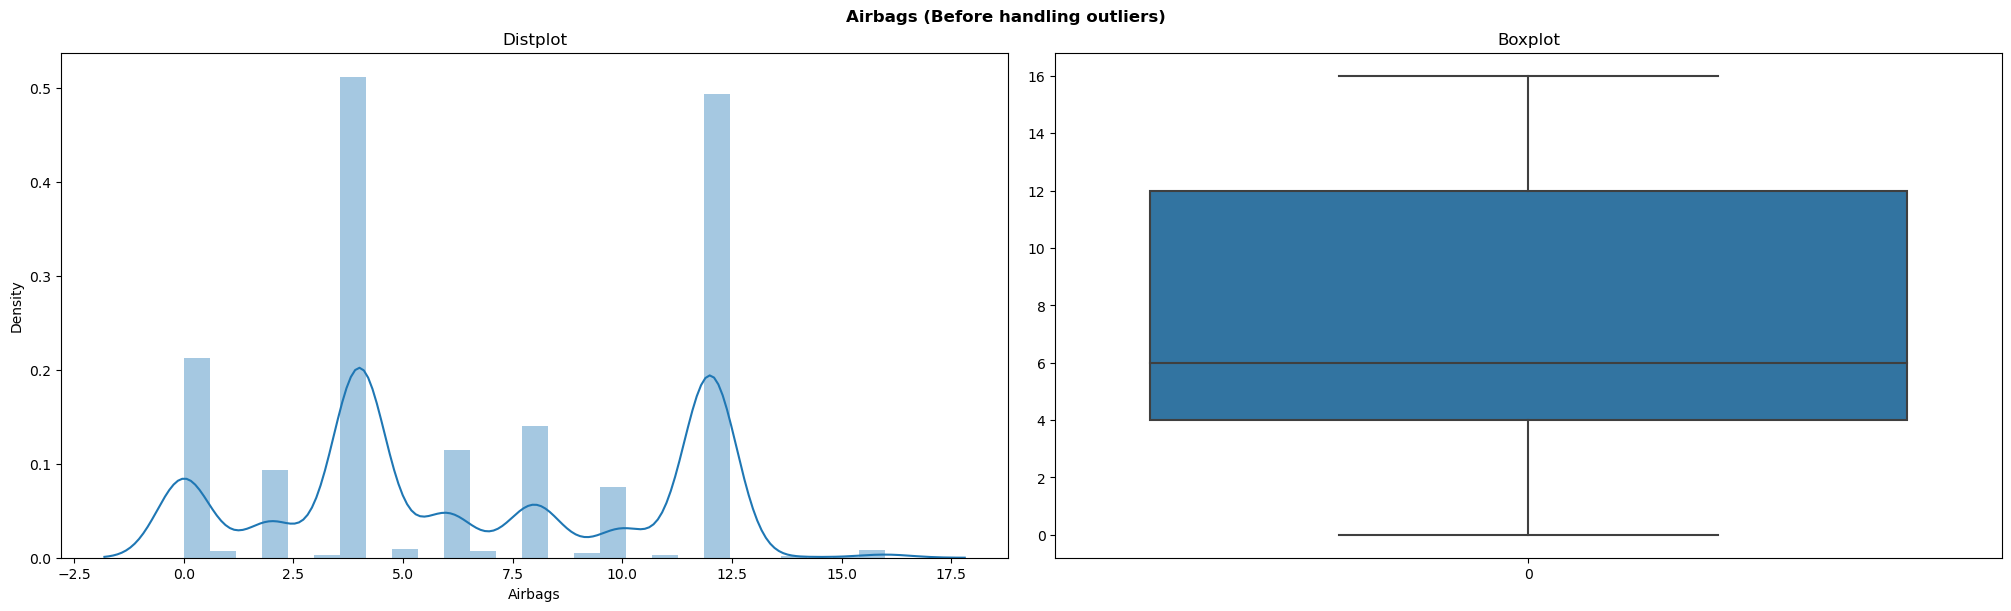

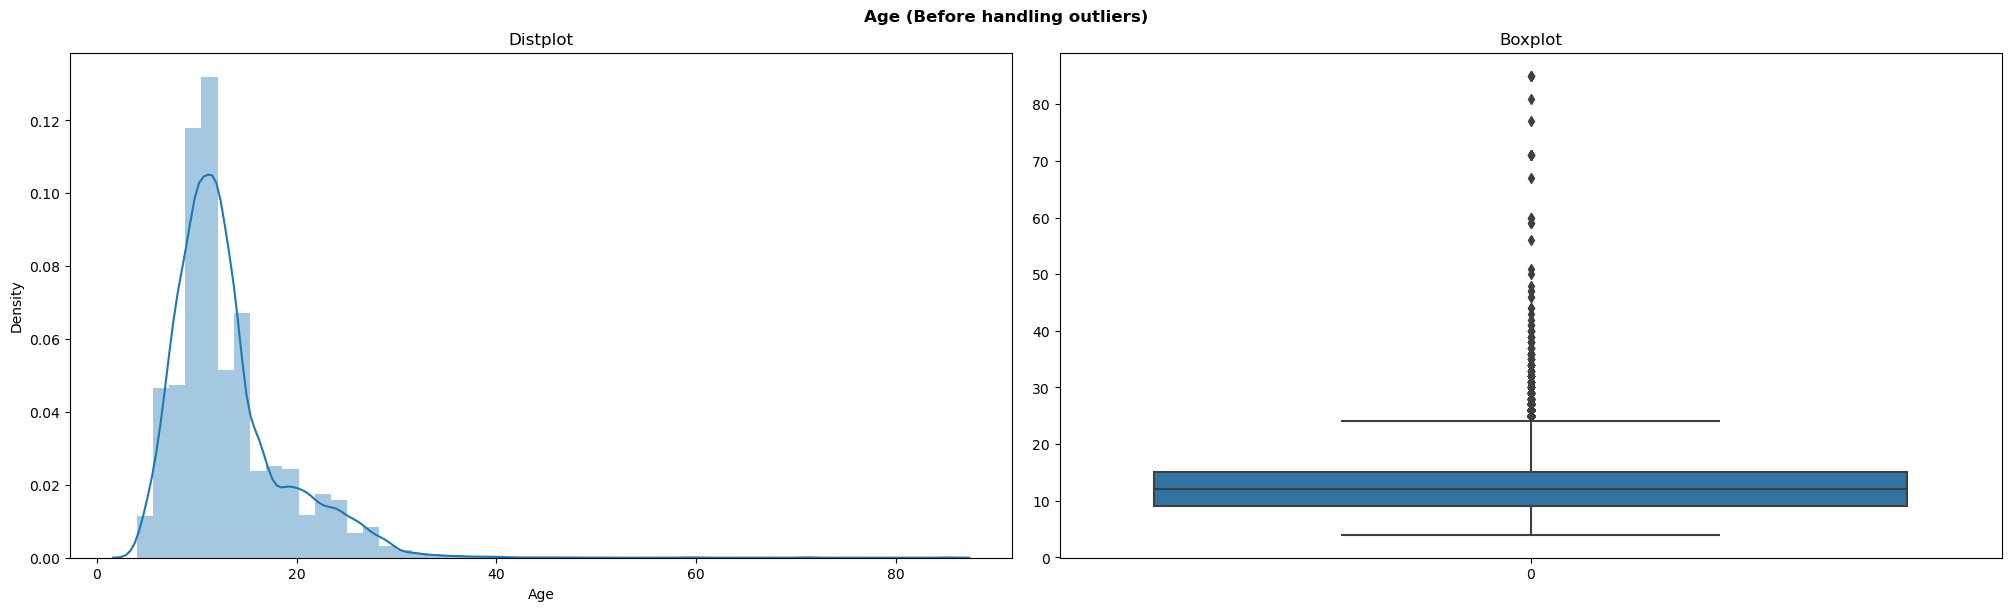

In [15]:
for col in numerical_cols:
    fig, ax =plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20, 6)
    sns.distplot(dataset[col], ax=ax[0]).set(title="Distplot")
    sns.boxplot(dataset[col], ax=ax[1]).set(title="Boxplot")
    plt.suptitle(f'{col.title()} (Before handling outliers)',weight='bold')
    fig.show()

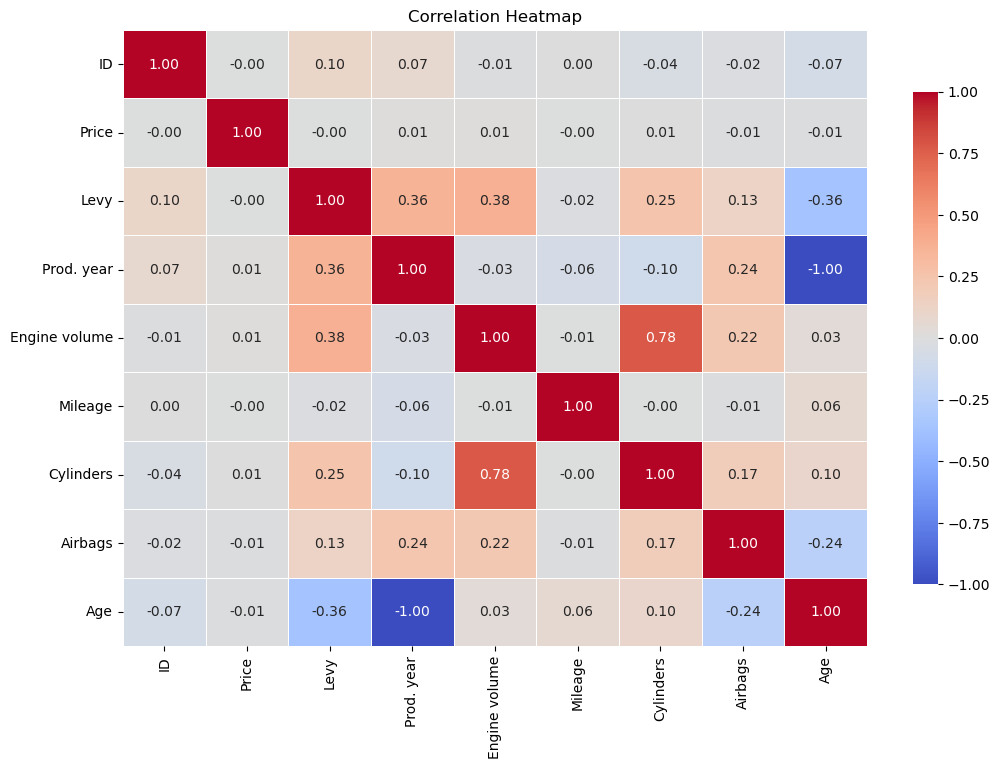

In [16]:
cor= dataset.select_dtypes(exclude=object).corr()
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(cor, annot=True, linewidths=0.6, cmap='coolwarm', cbar_kws={'shrink': 0.8}, fmt=".2f")

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

## cat feats

<Figure size 1400x600 with 0 Axes>

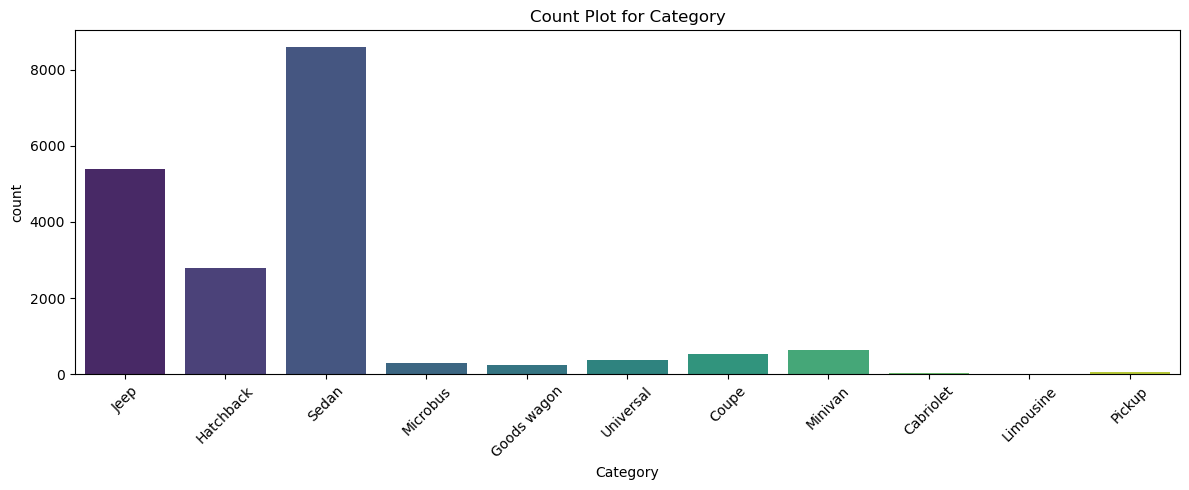

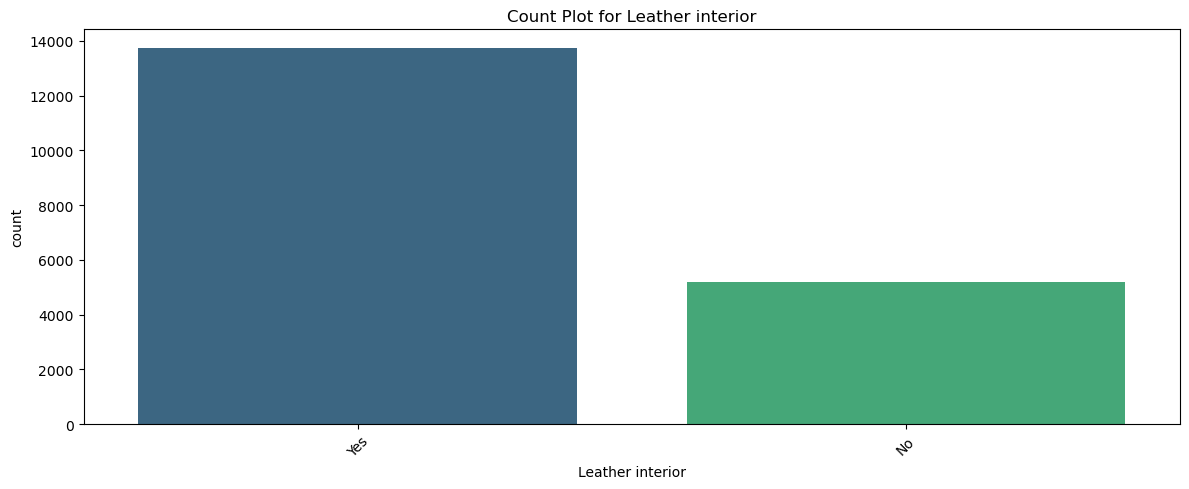

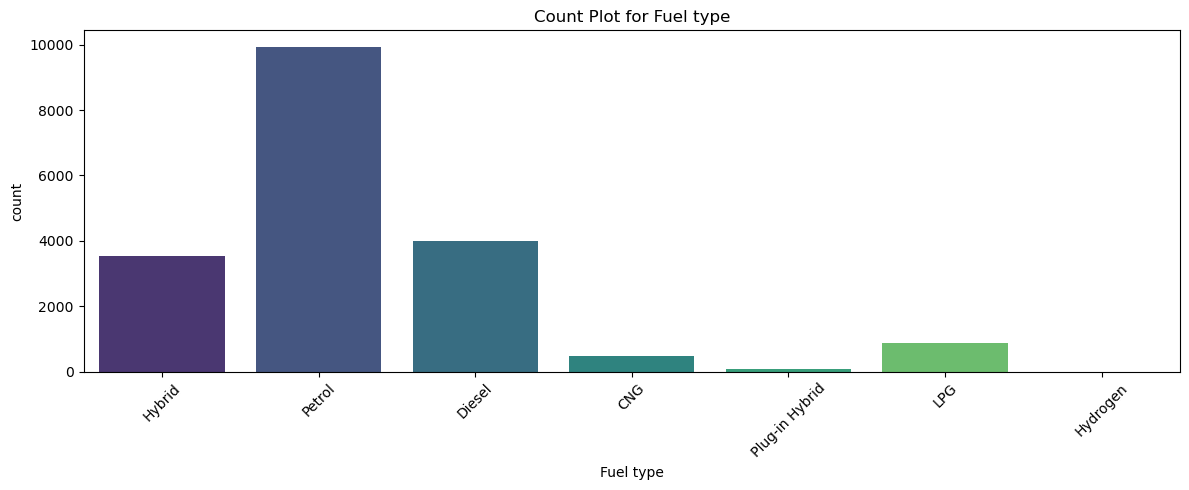

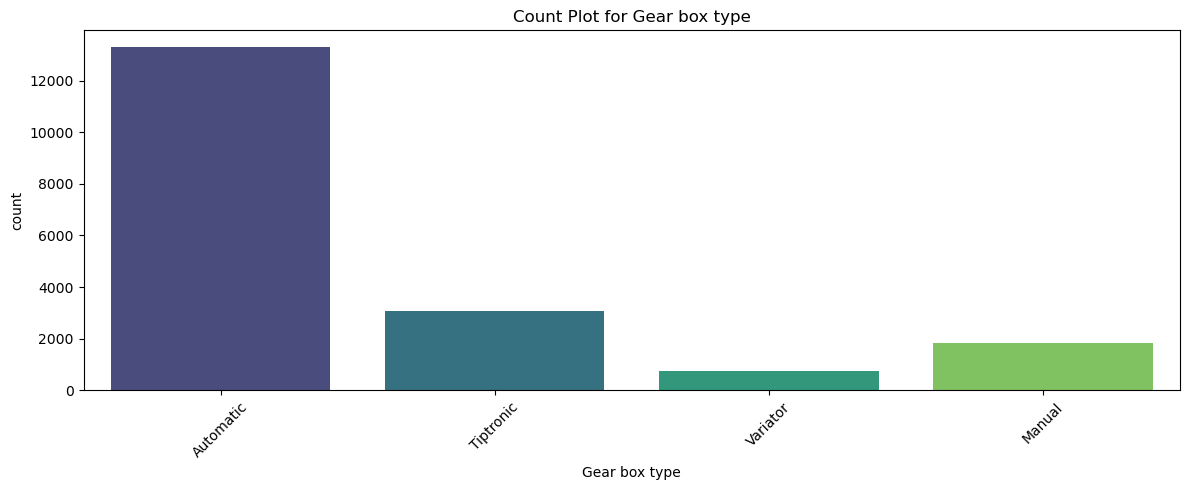

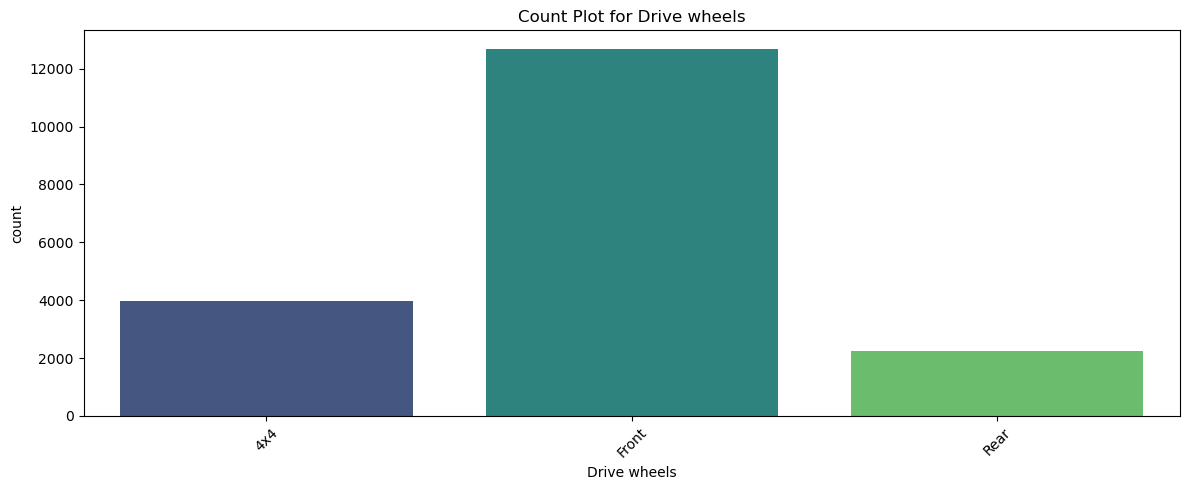

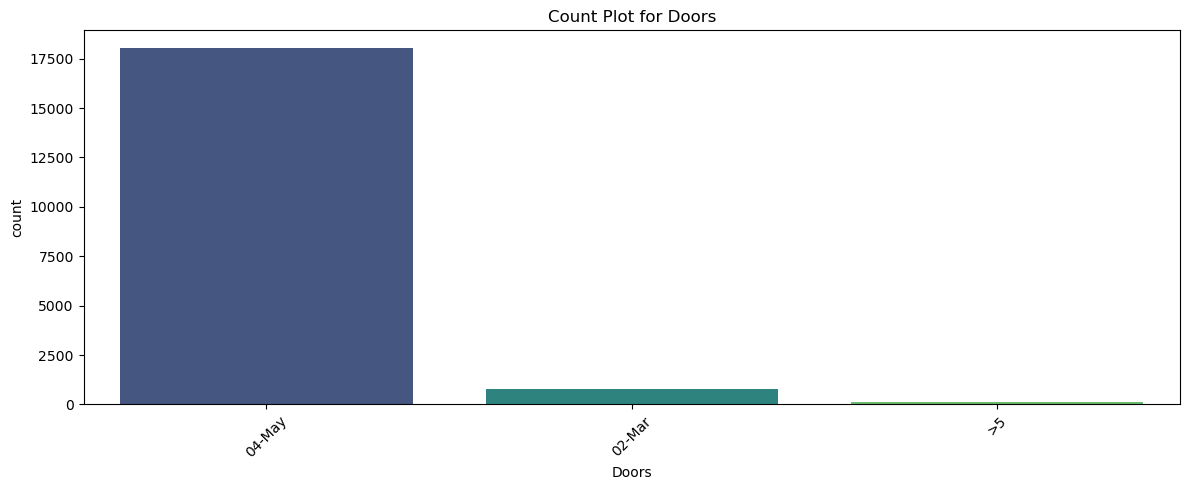

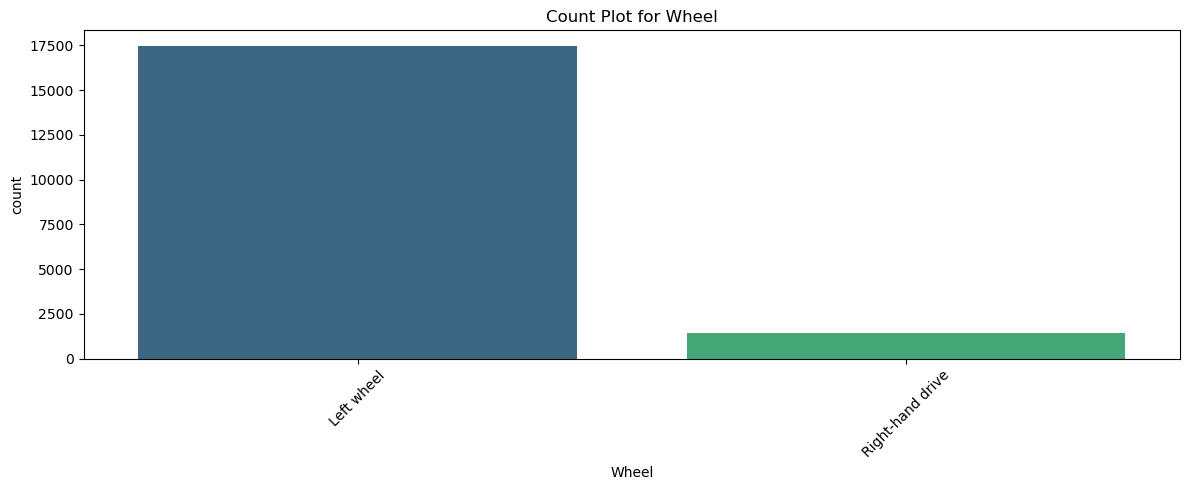

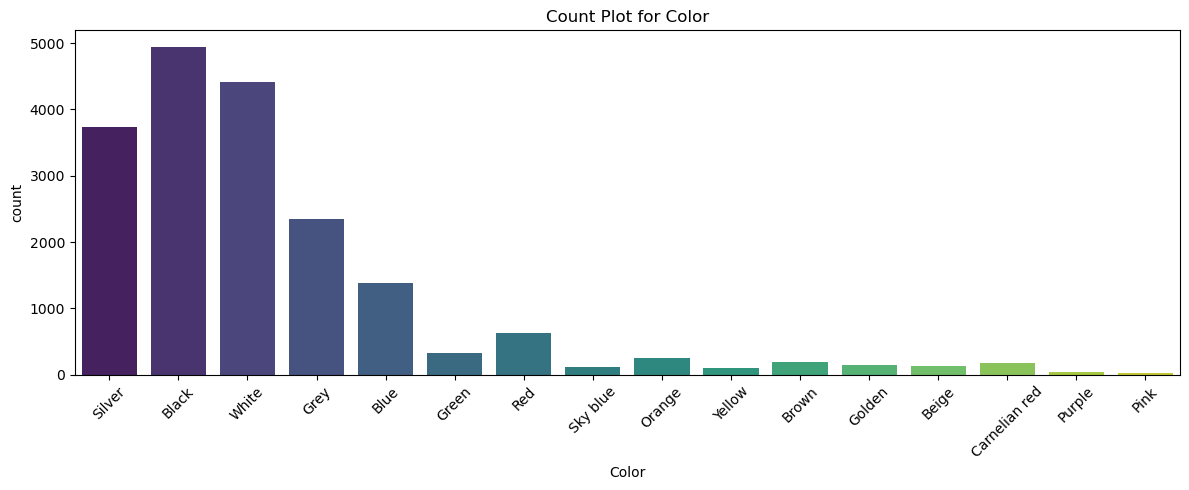

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical features
cat_features = ['Category', 'Leather interior', 
                'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']

# Loop through each categorical feature and create a count plot
plt.figure(figsize=(14, 6))
for feature in cat_features:
    plt.figure(figsize=(12, 5))
    sns.countplot(data=dataset, x=feature, palette="viridis")
    plt.title(f'Count Plot for {feature}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.tight_layout()       # Adjust the plot to fit nicely
    plt.show()


In [18]:
top_10_cars = dataset.Manufacturer.value_counts().sort_values(ascending=False)[:10]
top_10_cars

Manufacturer
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
Name: count, dtype: int64

## split data_set

In [19]:
from sklearn.model_selection import train_test_split
X=dataset.drop('Price',axis=1)
y=dataset['Price']
# Assuming `X` is your feature set and `y` is your target variable
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)




In [20]:
train= pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
val= pd.concat([X_val.reset_index(drop=True), y_val.reset_index(drop=True)], axis=1)


In [21]:
train

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age,Price
0,45511745,585.0,HYUNDAI,Elantra,2013,Sedan,No,Petrol,1.8,70000,4.0,Tiptronic,Front,04-May,Left wheel,Silver,0,11,16778
1,45815994,751.0,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,111930,4.0,Automatic,Front,04-May,Left wheel,Silver,12,11,4077
2,44045326,1031.0,MAZDA,Demio,2013,Hatchback,No,Petrol,1.2,129000,4.0,Automatic,Front,04-May,Right-hand drive,Grey,4,11,8000
3,45766575,1018.0,MERCEDES-BENZ,E 350,2011,Sedan,Yes,Diesel,3.0,273186,6.0,Automatic,Rear,04-May,Left wheel,White,12,13,9879
4,45792848,0.0,RENAULT,Twingo,2001,Hatchback,No,Petrol,1.2,777,4.0,Manual,Front,02-Mar,Left wheel,Purple,4,23,3300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17026,45396162,3989.0,INFINITI,QX56,2006,Jeep,Yes,Petrol,5.6,219200,8.0,Automatic,4x4,>5,Left wheel,Silver,16,18,18817
17027,45620667,1399.0,MERCEDES-BENZ,E 350,2010,Sedan,Yes,Diesel,3.5,256914,6.0,Automatic,4x4,04-May,Left wheel,Grey,12,14,8938
17028,45767115,0.0,BMW,318,1995,Hatchback,No,Petrol,2.0,0,6.0,Manual,Rear,02-Mar,Left wheel,Black,0,29,2509
17029,45784915,1018.0,BMW,330,2011,Sedan,Yes,Petrol,3.0,70000,6.0,Tiptronic,Rear,04-May,Left wheel,White,12,13,18817


In [22]:
train['Price_log']=np.log1p(train['Price'])
val['Price_log']=np.log1p(val['Price'])

train['Mileage_log']=np.log1p(train['Mileage'])
val['Mileage_log']=np.log1p(val['Mileage'])
num=['Price']
def handle_outliers(df, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Determine outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        print(f'Outliers in {col}:')
        print(outliers)
        
        # Option 1: Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        
        # Option 2: Replace outliers with median
        # median = df[col].median()
        # df[col] = df[col].mask((df[col] < lower_bound) | (df[col] > upper_bound), median)

    return df
# Handle outliers in numerical columns


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder,PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge  # Import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def predict_eval(model, data, train_features, name):
    # Make predictions
    y_pred = model.predict(data[train_features])
    
    # Calculate evaluation metrics
    rmse = mean_squared_error(data['Price_log'], y_pred, squared=False)  # Update target variable
    r2 = r2_score(data['Price_log'], y_pred)  # Update target variable
    print(f"{name} RMSE = {rmse:.4f} - R2 = {r2:.4f}")

def approach1(train, test):
    # Define numeric and categorical features
    numeric_features = ['Levy','Engine volume','Mileage_log'] 
    
    categorical_features = ['Manufacturer', 'Model', 'Category', 
                            'Fuel type', 'Color', 'Drive wheels', 
                            'Gear box type','Airbags','Age','Cylinders','Leather interior','Wheel']
    

    # Example categorical features

    # Combine features for training
    train_features = categorical_features + numeric_features

    # Define the column transformer for preprocessing
    column_transformer = ColumnTransformer(transformers=[
        ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ('scaling', StandardScaler(), numeric_features)  # Scale numeric features
    ], remainder='passthrough')

    # Create a pipeline for preprocessing and regression
    pipeline = Pipeline(steps=[
        ('ohe', column_transformer),
        ('poly',PolynomialFeatures(degree=2,interaction_only=False)),
        ('regression', Ridge(10))  # Use LinearRegression for fitting the model
    ])
    
    # Fit the model on training data
    model = pipeline.fit(train[train_features], train['Price_log'])  # Update target variable

    # Evaluate the model
    predict_eval(model, train, train_features, "Train")
    predict_eval(model, test, train_features, "Test")

In [32]:
approach1(train,val)

Train RMSE = 0.8424 - R2 = 0.7163
Test RMSE = 1.1326 - R2 = 0.5096


C:\Users\lap shop\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\lap shop\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
Train RMSE = 0.8541 - R2 = 0.7083
Test RMSE = 1.1283 - R2 = 0.5133